<a href="https://colab.research.google.com/github/arvindhvasu/GL_Pneumonia_Detection/blob/Dev_Vijay/Project_CV_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage 1 : Pre-Processing,Data Visualization,EDA**

1. Pre-Processing, Data Visualization, EDA
2. Dealing with missing values
3. Exploring the given Data files, classes and images of different classes.
4. Visualization of different classes
5. Analysis from the visualization of different classes.


## **Mount the Dataset from the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary libraries for pre-processing 

*   **Pandas** - for data structures & data analysis
*   **Numpy** - for computing with array objects
*   **Scikitlearn**- for pre-preprocessing & prediction
*   **Matplotlib** - for plotting tool library
*   **Seaborn** - for data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from seaborn import countplot
from matplotlib.pyplot import figure, show
import os
!pip install pydicom
import pydicom as dcm
import matplotlib
from matplotlib.patches import Rectangle
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

# **Extracting & Loading the pneumonia dataset**

In [0]:
# importing required modules 
from zipfile import ZipFile

In [0]:
# specifying the zip file name 
capstone_project = "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip"

In [0]:
# opening the zip file in READ mode 
with ZipFile(capstone_project, 'r') as zip: 
    # extracting all the files 
    zip.extractall()
   

In [7]:
#Set your project path 
capstone_project =  '/content'
import os
arr = os.listdir('/content')
print(arr)

['.config', 'stage_2_test_images', 'GCP Credits Request Link - RSNA.txt', 'stage_2_train_images', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'drive', 'stage_2_train_labels.csv', 'sample_data']


In [66]:
ls

 drive/                                 stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images/
 sample_data/                           stage_2_train_images/
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv


## **Reading through the different classes of pneumonia to understand the Target Variable**

*   **No Lung Opacity/ Not Normal:** No Pneumonia but some abnormality observed
*   **Normal:** No Pneumonia observed
*   **Lung Opacity:** Pneumonia observed 

## **Reading through the Class Dataset**

In [0]:
df_class_info=pd.read_csv('/content/stage_2_detailed_class_info.csv')

In [9]:
df_class_info.shape

(30227, 2)

In [10]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [11]:
df_class_info.describe(include='all')

,patientId,class
count,30227,30227
unique,26684,3
top,7d674c82-5501-4730-92c5-d241fd6911e7,No Lung Opacity / Not Normal
freq,4,11821


In [12]:
df_class_info['patientId'].value_counts()

7d674c82-5501-4730-92c5-d241fd6911e7    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
                                       ..
7bc1d034-2552-4768-9b84-854df85731cb    1
dc1ce8b2-93a0-4592-8f02-746d745562b2    1
326aec21-e8f0-497f-9cc0-e56979c0aa78    1
69731835-c6c3-4208-8335-858f19214f1e    1
80a5e433-c26e-4701-a88b-271467ed3163    1
Name: patientId, Length: 26684, dtype: int64

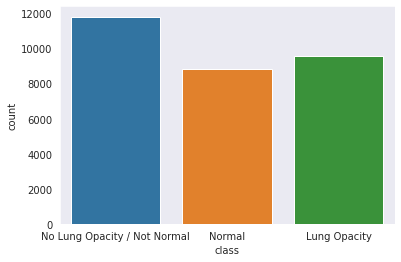

In [13]:
figure()
countplot(data=df_class_info,x="class")
show()

## **Reading through the Train Labels Dataset**

In [0]:
df_train_labels=pd.read_csv('/content/stage_2_train_labels.csv')

In [34]:
df_train_labels.shape


(30227, 6)

In [35]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [36]:
df_train_labels.describe(include='all')

,patientId,x,y,width,height,Target
count,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,NaN,NaN,NaN,NaN,NaN
top,7d674c82-5501-4730-92c5-d241fd6911e7,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


In [38]:
df_train_labels['patientId'].value_counts()

7d674c82-5501-4730-92c5-d241fd6911e7    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
                                       ..
7bc1d034-2552-4768-9b84-854df85731cb    1
dc1ce8b2-93a0-4592-8f02-746d745562b2    1
326aec21-e8f0-497f-9cc0-e56979c0aa78    1
69731835-c6c3-4208-8335-858f19214f1e    1
80a5e433-c26e-4701-a88b-271467ed3163    1
Name: patientId, Length: 26684, dtype: int64

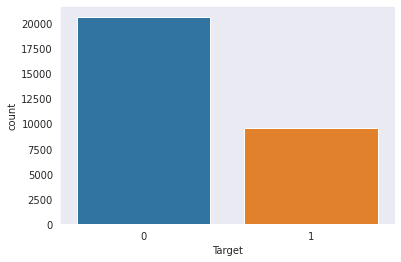

In [40]:
figure()
countplot(data=df_train_labels,x="Target")
show()

## **2. Dealing with missing values**

In [17]:
df_train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [41]:
df_class_info.isnull().sum()

patientId    0
class        0
dtype: int64

In [18]:
df_train_labels.groupby(["Target"]).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


In [42]:
df_class_info.groupby(["class"]).count() 

,patientId
class,
Lung Opacity,9555
No Lung Opacity / Not Normal,11821
Normal,8851


In [19]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [43]:
df_class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [44]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [45]:
df_class_info.columns

Index(['patientId', 'class'], dtype='object')

In [24]:
df_train_labels[df_train_labels['Target'] == 1]

,patientId,x,y,width,height,Target
4,16,264.0,152.0,213.0,379.0,1
5,16,562.0,152.0,256.0,453.0,1
8,24,323.0,577.0,160.0,104.0,1
9,24,695.0,575.0,162.0,137.0,1
14,34,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
30220,19460,316.0,504.0,179.0,273.0,1
30221,19461,609.0,464.0,240.0,284.0,1
30222,19461,185.0,298.0,228.0,379.0,1
30225,19464,570.0,393.0,261.0,345.0,1


In [25]:
df_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [26]:
round((df_class_info['class'].value_counts()/len(df_class_info.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

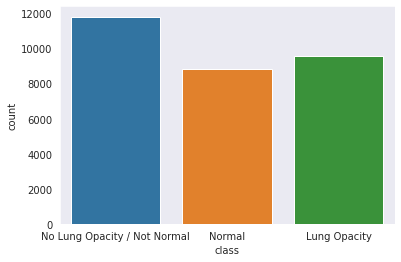

In [27]:
sns.countplot(df_class_info['class'])

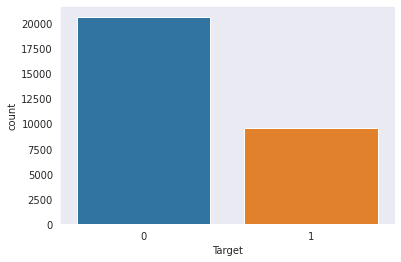

In [46]:
sns.countplot(df_train_labels['Target'])

**“Merging” two datasets is the process of bringing two datasets together into one & aligning the rows from each based on common attributes or columns,The words “merge” & “join” are used relatively interchangeably in Pandas & other languages**

**Merging two datasets "df_class_info,df_train_labels"**

In [0]:
train_class_df=df_train_labels.merge(df_class_info, left_on='patientId', right_on='patientId', how='inner')

In [48]:
df_Train_Class_labels = df_train_labels.merge(df_class_info, left_on='patientId', right_on='patientId', how='inner')
df_class_info.shape

(30227, 2)

In [60]:
df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [54]:
df_Train_Class_labels.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [55]:
df_Train_Class_labels['patientId'].value_counts()

7d674c82-5501-4730-92c5-d241fd6911e7    16
31764d54-ea3b-434f-bae2-8c579ed13799    16
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    16
32408669-c137-4e8d-bd62-fe8345b40e73    16
8dc8e54b-5b05-4dac-80b9-fa48878621e2    16
                                        ..
7bc1d034-2552-4768-9b84-854df85731cb     1
dc1ce8b2-93a0-4592-8f02-746d745562b2     1
326aec21-e8f0-497f-9cc0-e56979c0aa78     1
69731835-c6c3-4208-8335-858f19214f1e     1
80a5e433-c26e-4701-a88b-271467ed3163     1
Name: patientId, Length: 26684, dtype: int64

In [56]:
df_Train_Class_labels['patientId'].describe(include='all')

count                                    37629
unique                                   26684
top       7d674c82-5501-4730-92c5-d241fd6911e7
freq                                        16
Name: patientId, dtype: object

In [0]:
df_Train_Class_labels = df_Train_Class_labels.drop_duplicates()

In [62]:
df_Train_Class_labels = df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


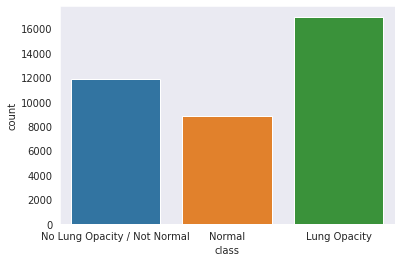

In [58]:
figure()
countplot(data=df_Train_Class_labels,x="class")
show()

**OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory**

In [70]:
import os
image_train_loc = os.listdir('/content/stage_2_train_images')
image_test_loc = os.listdir('/content/stage_2_test_images')
print("Number of images in train set:", len(image_train_loc),"\nNumber of images in test set:", len(image_test_loc))

Number of images in train set: 26684 
Number of images in test set: 3000


In [71]:
print("Unique Patient Id", df_Train_Class_labels['patientId'].nunique())

TypeError: ignored

In [69]:
TestPatientID = df_Train_Class_labels["patientId"][0]
TestPatientID = TestPatientID+'.dcm'
dicom_file_loc = os.path.join("/content/stage_2_train_images",TestPatientID)
dicom_file_dataset = dcm.read_file(dicom_file_loc)
dicom_file_dataset

TypeError: ignored

In order to work with the Medical images that are stored in a special format called DICOM files - (*Dcm),we would need to install the package to create an understanding of the image type & gives the opportunity to further explore it

In [28]:
pip install pydicom

In [72]:
import pydicom, glob, pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

patientId = df_class_info['patientId'][1] #No lung opacity/ Not normal
dcm_train = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_med = pydicom.read_file(dcm_train)
print(dcm_med)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [73]:
pip install common

  Created wheel for common: filename=common-0.1.2-cp36-none-any.whl size=3734 sha256=94e4a573b09ed08a39c1dd1852a1cf977bbe2a43fe482a5be5124eb6722dac05
  Stored in directory: /root/.cache/pip/wheels/2e/8f/ec/9ac55fd8f7923ddf23619c89b42dbbcfc71db6ee41ad5e7b5e
Successfully built common


In [0]:
#!python3 "/content/common.py"
import common as com

In [0]:
def display_images(data):
	    img_data = list(data.T.to_dict().values())
	    #img_data = list(data)
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
	    plt.show()
	    
def display_images_with_boxes(data):
	    img_data = list(data.T.to_dict().values())
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
              rows = df_Train_Class_labels[df_Train_Class_labels['patientId']==data_row['patientId']]
              box_data = list(rows.T.to_dict().values())
              for j, row in enumerate(box_data):
                  ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                      width=row['width'],height=row['height'], 
                      linewidth=1,edgecolor='r',facecolor='none'))   
	    plt.show()
   
def collect_metadata(data, location):
	    dcm_columns = None

	    for n, pid in enumerate(data['patientId'].unique()):
              imageName = pid+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images' + location, imageName)
              dcm_data = dcm.read_file(imagePath)
              """ 
              if not dcm_columns:
                  dcm_columns = dcm_data.dir()

              for col in dcm_columns:
                  if col in ["PatientAge", "PatientSex", "ViewPosition"]:
                        value = dcm_data.data_element(col).value
                        index = data[data['patientId'] == pid].index
                        data.loc[index, col] = value
                """ 
              index = data[data['patientId'] == pid].index
              data.loc[index, "PatientAge"] = dcm_data.data_element("PatientAge").value
              data.loc[index, "PatientSex"] = dcm_data.data_element("PatientSex").value
              data.loc[index, "ViewPosition"] = dcm_data.data_element("ViewPosition").value
              del dcm_data

In [77]:
uni_patient_id = ['00322d4d-1c29-4943-afc9-b6754be640eb','003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
test_df = df_Train_Class_labels[df_Train_Class_labels.patientId.isin(uni_patient_id)]
display_images(test_df)

AttributeError: ignored

In [78]:
Test_tar_df = df_Train_Class_labels[df_Train_Class_labels['Target']==1].sample(5)
display_images_with_boxes(Test_tar_df)

TypeError: ignored

In [79]:
collect_metadata(df_Train_Class_labels, "capstone_project")
df_Train_Class_labels.head(5)

TypeError: ignored

In [0]:
import pickle
file_Name = "df_Train_Class_pickle"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df_Train_Class_labels to the
# file named 'df_Train_Class_pickle'
pickle.dump(df_Train_Class_labels, fileObject)   

# here we close the fileObject
fileObject.close()

In [81]:
file_Name = "/df_Train_Class_pickle"
# we open the file for reading
fileObject = open(capstone_project+file_Name,'rb')  
# load the object from the file into temp var b
df_Train_Class_pic = pickle.load(fileObject)  
df_Train_Class_pic.head(5)

AttributeError: ignored

In [82]:
countplot(data = df_Train_Class_pic, x = 'PatientSex', hue = 'Target');

ValueError: ignored

In [83]:
#Create a new column 'area' to capture of area of bounding boxes
df_Train_Class_pic['area'] = df_Train_Class_pic['height'] * df_Train_Class_pic['width']

TypeError: ignored

OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory

In [30]:
import os
train_images = os.listdir('/content/stage_2_train_images')
test_images = os.listdir('/content/stage_2_test_images')

print("No. of train images:", len(train_images))
print("No. of test images:", len(test_images))

No. of train images: 26684
No. of test images: 3000


In [0]:
def display_images(data):
    img_data = list(data.T.to_dict().values())
    #img_data = list(data)
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join("/content/stage_2_train_images",imageName)
        data_row_img = dcm.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
    plt.show()